In [1]:
import pygmt
#from salvus import namespace as sn
import numpy as np
import os

import xarray as xr
import geopandas as gpd
#from salvus.mesh.unstructured_mesh_utils import extract_model_to_regular_grid

In [2]:
sp = xr.open_dataset('/Users/claired/Desktop/Salvus/SPiRaL_20s_mesh.nc')
wus = xr.open_dataset('/Users/claired/Desktop/Salvus/WUS256_20s_mesh.nc')
cs = xr.open_dataset('/Users/claired/Desktop/Salvus/CSEM_20s_mesh.nc')

sp_dep = xr.open_dataset('/Users/claired/Desktop/Backup/data/CANV_SP_Current07072022.nc')
wus_dep = xr.open_dataset('/Users/claired/Desktop/Backup/data/CANV_WUS_Current07072022.nc')
csem_dep = xr.open_dataset('/Users/claired/Desktop/Backup/data/CANV_CSEM_Current07072022.nc')

In [18]:
lat_min = 31.5
lat_max = 43
lon_min = -125.0
lon_max = -114.0

dp1 = 5e3
dp2 = 55e3

In [19]:
vsv = sp.VSV.sel(depth=dp1,method='nearest')
vsh = sp.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_sp_1 = (vsh/vsv)**2
vav_sp_1 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_sp = 100*(vav_diff/vav_mean)


vsv = sp.VSV.sel(depth=dp2,method='nearest')
vsh = sp.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_sp_2 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

#vav_sp_2 = 100*(vav_diff/vav_mean)

In [20]:
vsv = sp_dep.VSV.sel(depth=dp1,method='nearest')
vsh = sp_dep.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_cnsp_1 = (vsh/vsv)**2
vav_cnsp_1 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_per_sp_1 = 100*(vav_diff/vav_mean)

vsv = sp_dep.VSV.sel(depth=dp2,method='nearest')
vsh = sp_dep.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_cnsp_2 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_per_sp_2 = 100*(vav_diff/vav_mean)

In [21]:
vsv = wus.VSV.sel(depth=dp1,method='nearest')
vsh = wus.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_wus_1 = (vsh/vsv)**2
vav_ws_1 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_wus_1 = 100*(vav_diff/vav_mean)

vsv = wus.VSV.sel(depth=dp2,method='nearest')
vsh = wus.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_ws_2 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_wus_2 = 100*(vav_diff/vav_mean)

In [22]:
vsv = wus_dep.VSV.sel(depth=dp1,method='nearest')
vsh = wus_dep.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_cnws_1 = (vsh/vsv)**2
vav_cnws_1 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_per_wus_1 = 100*(vav_diff/vav_mean)

vsv = wus_dep.VSV.sel(depth=dp2,method='nearest')
vsh = wus_dep.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_cnws_2 = vav
vav_mean = vav.mean().values

vav_diff = vav - vav_mean

vav_per_wus_2 = 100*(vav_diff/vav_mean)

In [23]:
vsv = cs.VSV.sel(depth=dp1,method='nearest')
vsh = cs.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_cs_1 = (vsh/vsv)**2
vav_cs_1 = vav
vav_mean = vav.mean().values
vav_diff = vav - vav_mean
vav_csem_1 = 100*(vav_diff/vav_mean)

vsv = cs.VSV.sel(depth=dp2,method='nearest')
vsh = cs.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_cs_2 = vav
vav_mean = vav.mean().values
vav_diff = vav - vav_mean
vav_csem_2 = 100*(vav_diff/vav_mean)

In [24]:
vsv = csem_dep.VSV.sel(depth=dp1,method='nearest')
vsh = csem_dep.VSH.sel(depth=dp1,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
eta_cncs_1 = (vsh/vsv)**2
vav_cncs_1 = vav
vav_mean = vav.mean().values
vav_diff = vav - vav_mean
vav_per_csem_1 = 100*(vav_diff/vav_mean)


vsv = csem_dep.VSV.sel(depth=dp2,method='nearest')
vsh = csem_dep.VSH.sel(depth=dp2,method='nearest')
vav = np.sqrt(((2*(vsh)**2)+vsv**2)/3)
vav_cncs_2 = vav
vav_mean = vav.mean().values
vav_diff = vav - vav_mean
vav_per_csem_2 = 100*(vav_diff/vav_mean)

In [25]:
sp_diff_1 = np.log(vav_cnsp_1/vav_sp_1)
sp_diff_2 = np.log(vav_cnsp_2/vav_sp_2)

wus_diff_1 = np.log(vav_cnws_1/vav_ws_1)
wus_diff_2 = np.log(vav_cnws_2/vav_ws_2)

csem_diff_1 = np.log(vav_cncs_1/vav_cs_1)
csem_diff_2 = np.log(vav_cncs_2/vav_cs_2)

In [26]:
eta_sp_diff = np.log(eta_cnsp_1/eta_sp_1)
eta_ws_diff = np.log(eta_cnws_1/eta_wus_1)
eta_cs_diff = np.log(eta_cncs_1/eta_cs_1)

In [27]:
print(sp_diff_1.min().values)
print(wus_diff_1.min().values)
print(csem_diff_1.min().values)

print(sp_diff_1.max().values)
print(wus_diff_1.max().values)
print(csem_diff_1.max().values)

-0.197036453183877
-0.12301029351437218
-0.22937750765257137
0.0902665586385203
0.1476327195696216
0.14121852419033207


In [28]:
print(vav_cncs_1.min().values)
print(vav_cnsp_1.min().values)
print(vav_cnws_1.min().values)

print(vav_cncs_1.max().values)
print(vav_cnsp_1.max().values)
print(vav_cnws_1.max().values)

2774.882505398451
2763.5334371505273
2466.817458881105
4110.2467589249345
3972.453086170669
3991.188367339684


In [29]:
print(eta_sp_diff.min().values)
print(eta_ws_diff.min().values)
print(eta_cs_diff.min().values)

print(eta_sp_diff.max().values)
print(eta_ws_diff.max().values)
print(eta_cs_diff.max().values)

-0.32384028433194906
-0.42487987283799994
-0.5831519337626061
0.31084941592895415
0.4557371052222256
0.24944328119750817


In [30]:
gorda = gpd.read_file("/Volumes/easystore/data/Slab2/cas_depth.shp")

oceanmask = pygmt.grdlandmask(region=[-125,-114,31.5,43.], spacing = '1m',
                              maskvalues=[1,np.nan, np.nan, np.nan, np.nan], resolution="h")

physio = gpd.read_file("./data/physio.shp")

print(gorda)

    DEPTH    REGION                                           geometry
0     420  Cascadia  LINESTRING (-119.80470 44.20000, -119.80000 44...
1     420  Cascadia  LINESTRING (-119.70770 38.70000, -119.70000 38...
2     400  Cascadia  LINESTRING (-120.05210 43.95000, -120.05000 43...
3     400  Cascadia  LINESTRING (-120.25850 42.50000, -120.25130 42...
4     400  Cascadia  LINESTRING (-119.81830 41.40000, -119.80000 41...
5     380  Cascadia  LINESTRING (-120.21470 43.80000, -120.20340 43...
6     380  Cascadia  LINESTRING (-120.15010 41.85000, -120.17080 41...
7     380  Cascadia  LINESTRING (-120.10660 41.75000, -120.10000 41...
8     360  Cascadia  LINESTRING (-119.18890 48.95000, -119.16360 48...
9     360  Cascadia  LINESTRING (-120.37140 43.55000, -120.36290 43...
10    360  Cascadia  LINESTRING (-120.42090 43.20000, -120.42550 43...
11    340  Cascadia  LINESTRING (-119.40220 49.15000, -119.40000 49...
12    340  Cascadia  LINESTRING (-120.16800 38.70000, -120.15000 38...
13    

In [31]:
gorda = gorda[27:29]

# Plotting Routine for Relative Vs anomalies

In [46]:
vmin = 3800
vmax = 5000
vspace = 25

ratmax = 0.20
ratmin = -ratmax
ratspace = 0.005

vs_series = (vmin, vmax, vspace)
ratio_series = (ratmin,ratmax,ratspace)

vs_above = [vmax,vmax]
vs_below = [vmin,vmin]

ratio_above = [ratmax,ratmax]
ratio_below = [ratmin,ratmin]

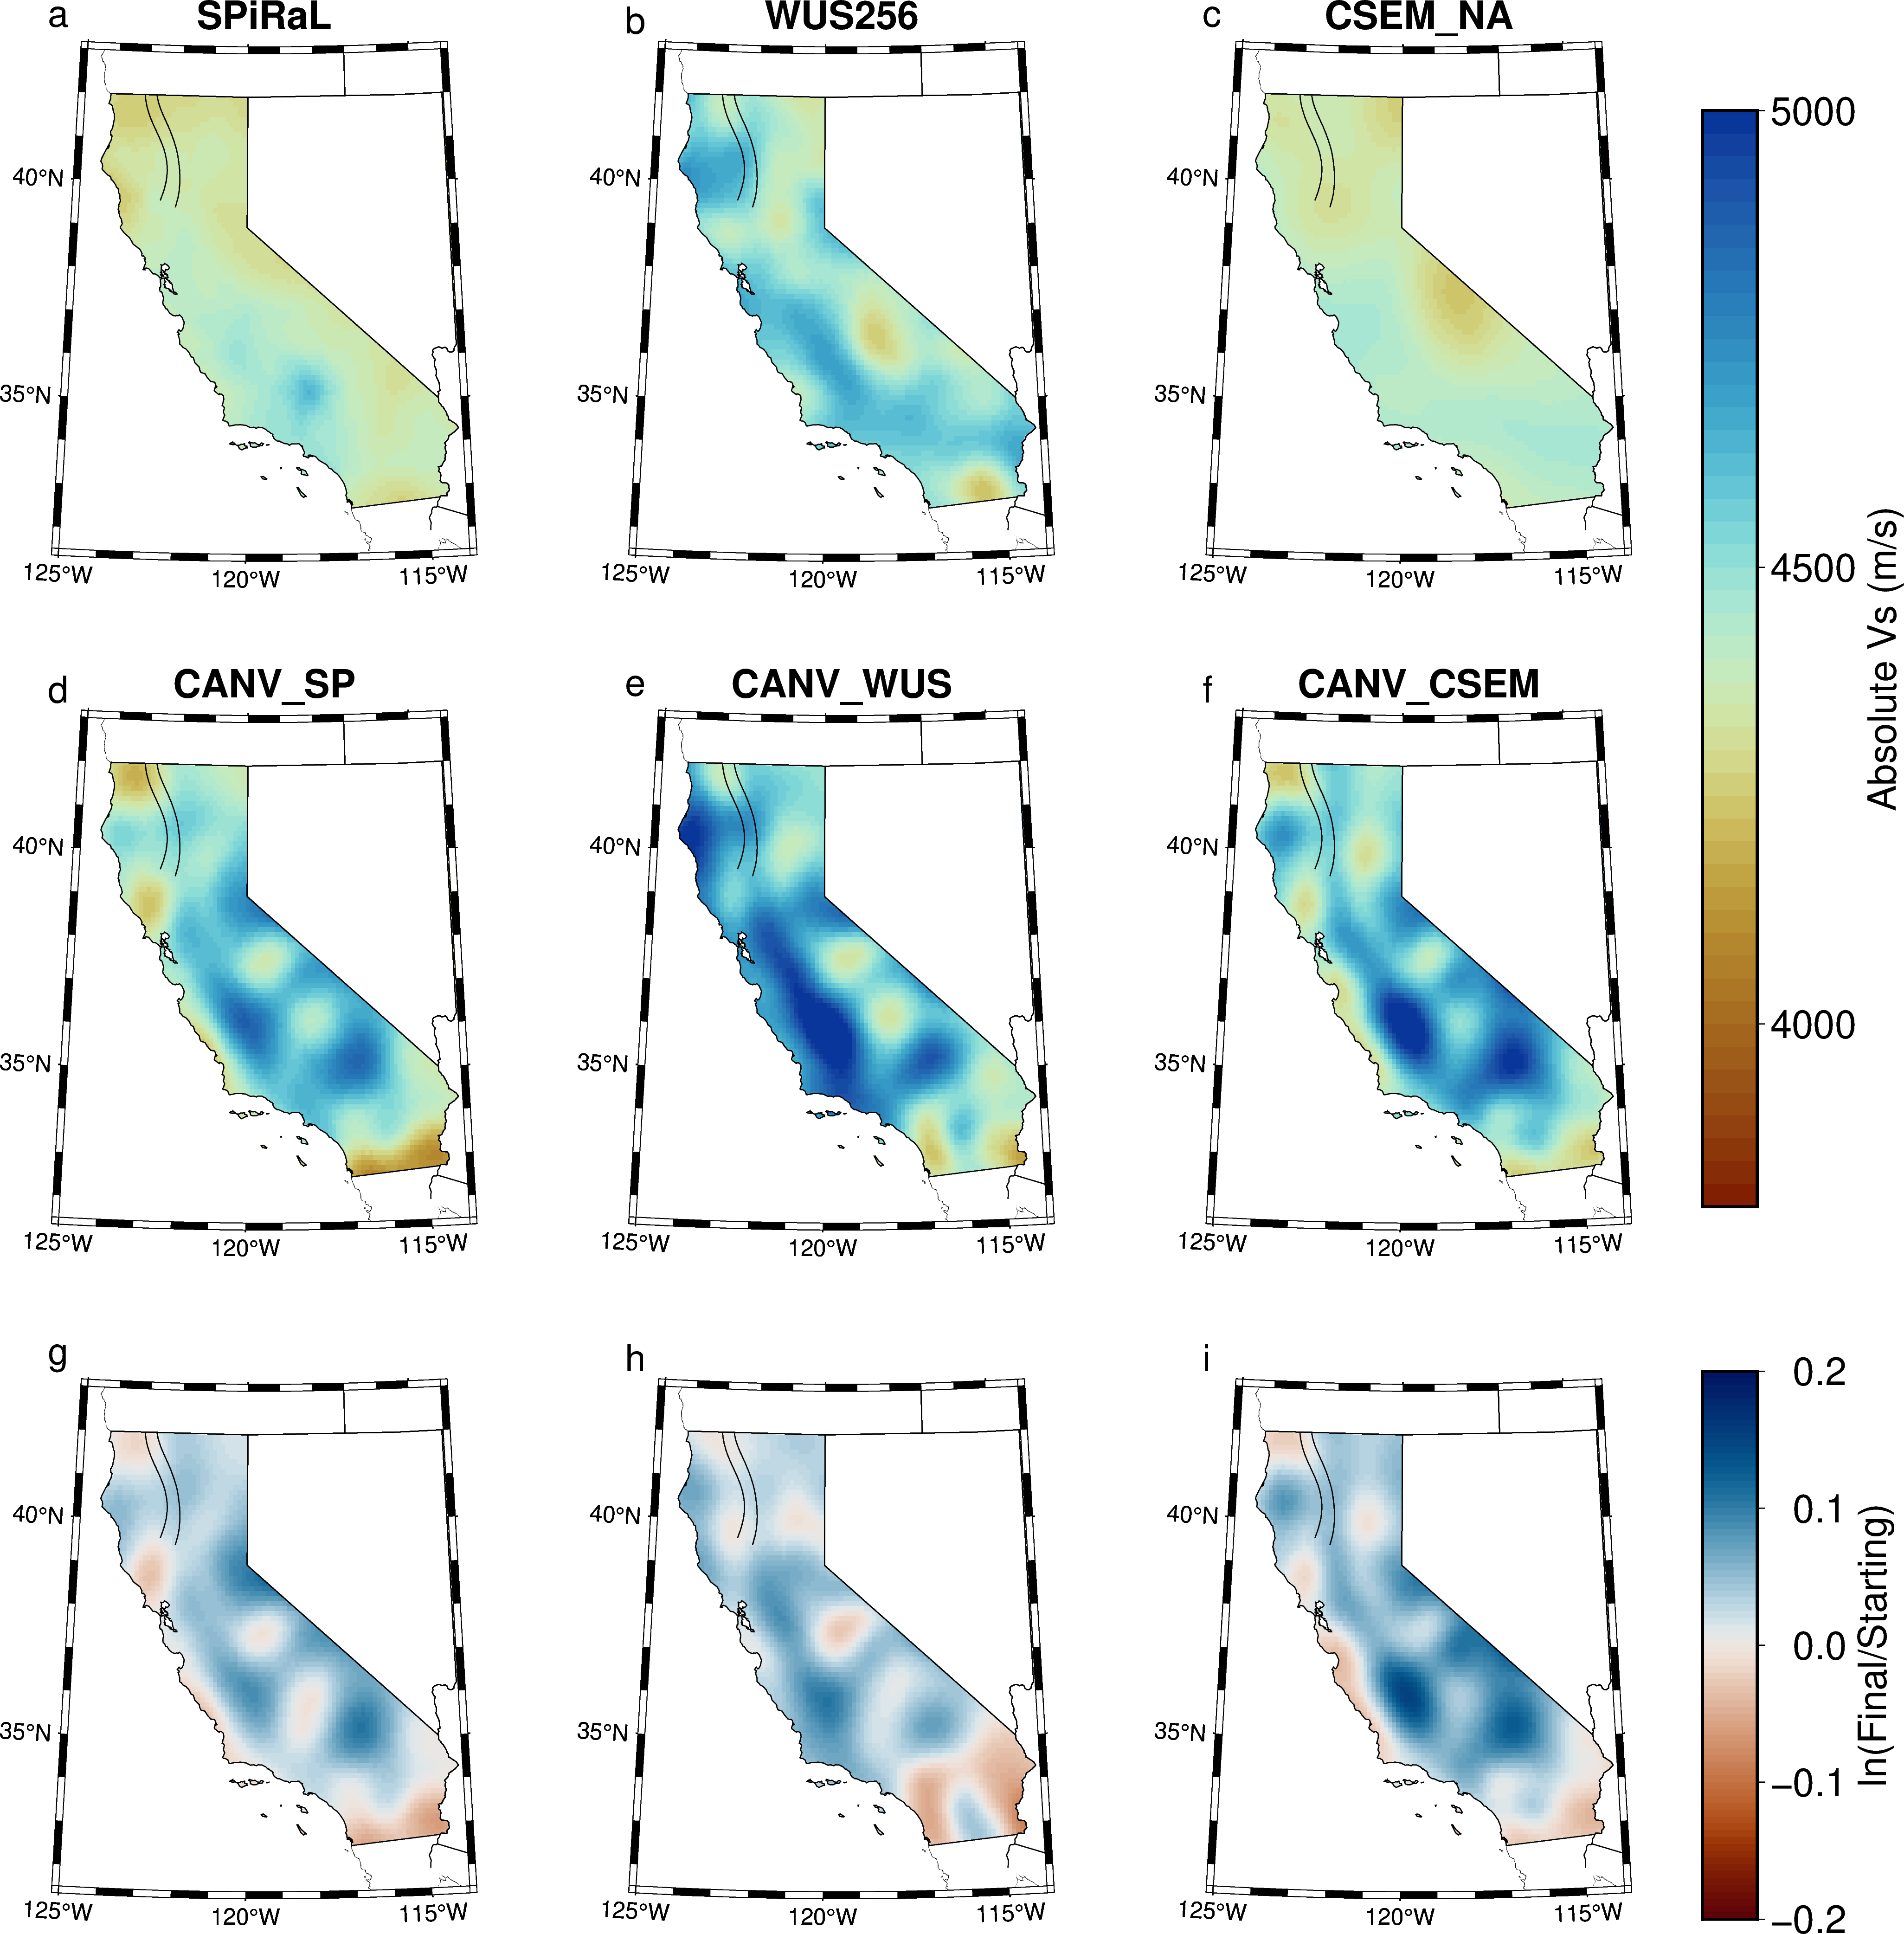

In [47]:
fig = pygmt.Figure()

#pygmt.makecpt(cmap="roma", series=vs_series)
#pygmt.makecpt(cmap="vik", reverse = True)
font = "20p,Helvetica-Bold"
# 'vik' = pygmt.makecpt(cmap='vik', series = (-0.2,0.2,0.05))
# cmap = 'roma'
with fig.subplot(ncols = 3, nrows = 3, figsize = ('30c','35c'), margins = ('0.5c','0.5c'),
                 autolabel = 'a+jTL+o-0.2c/0.6c+gwhite'):
    with fig.set_panel(panel = [0,0]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #SPiRaL Starting Model 5km Slice Vs
        SPiRaL = 'SPiRaL'
        fig.grdimage(grid=pygmt.grdclip(vav_sp_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', 
                 pen = '0.5p,black', panel = [0,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite',
                  panel = [0,0])
        fig.text(x = -120.55, y = 42.3, text = SPiRaL, font = font)
    with fig.set_panel(panel = [0,1]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #WUS Starting Model 5km Slice VS
        WUS = 'WUS256'
        fig.grdimage(grid=pygmt.grdclip(vav_ws_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [0,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [0,1])
        fig.text(x = -120.55, y = 42.3, text = WUS, font = font)
    with fig.set_panel(panel = [0,2]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #CSEM Starting Model 5km Slice VS
        CSEM = 'CSEM_NA'
        fig.grdimage(grid=pygmt.grdclip(vav_cs_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', pen = '0.5p,black',panel = [0,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [0,2])
        fig.text(x = -120.55, y = 42.3, text = CSEM, font = font)
    #CANV_SP Starting Model 5km Slice Vs
    with fig.set_panel(panel = [1,0]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        CNSP = 'CANV_SP'
        fig.grdimage(grid=pygmt.grdclip(vav_cnsp_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', pen = '0.5p,black',panel = [1,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [1,0])
        fig.text(x = -120.55, y = 42.3, text = CNSP, font = font)
    with fig.set_panel(panel = [1,1]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #CANV_WUS Starting Model 5km Slice VS
        fig.grdimage(grid=pygmt.grdclip(vav_cnws_2, below=vs_below, above=vs_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [1,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], 
                  dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [1,1])
        fig.text(x = -120.55, y = 42.3, text = 'CANV_WUS', font = font)
    with fig.set_panel(panel = [1,2]):
        pygmt.makecpt(cmap="roma", series=vs_series)
         #CANV_CS Starting Model 5km Slice VS
        CNCS = 'CANV_CSEM'
        fig.grdimage(grid=pygmt.grdclip(vav_cncs_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [1,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [1,2])
        fig.text(x = -120.55, y = 42.3, text = CNCS, font = font)
    with fig.set_panel(panel = [2,0]):
        pygmt.makecpt(cmap='vik', series = ratio_series, reverse = True)
        SPratio = 'ln(CANV_SP/SPiRaL)'
        fig.grdimage(grid=pygmt.grdclip(sp_diff_2, below = ratio_below, above = ratio_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [2,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,0])
    with fig.set_panel(panel = [2,1]):
        pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
        WSratio = 'ln(CANV_WUS/WUS256)'
        fig.grdimage(grid=pygmt.grdclip(wus_diff_2, below = ratio_below, above = ratio_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [2,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,1])
    with fig.set_panel(panel = [2,2]):
        pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
        CSratio = 'ln(CANV_CSEM/CSEM_NA)'
        fig.grdimage(grid=pygmt.grdclip(csem_diff_2, below = ratio_below, above = ratio_above), projection='L-119.5/37.25/31.5/43.0/7.5c', 
                    panel = [2,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '0.5p,black', panel = [2,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,2])

    
with pygmt.config(FONT='20p'):
    cmap = pygmt.makecpt(cmap="roma", series=vs_series)
    fig.colorbar(cmap=cmap, position="JMR+o15c/15c+w20c/1c",
    frame=["a500",'x+l"Absolute Vs (m/s)"'])
    cmap = pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
    fig.colorbar(cmap = cmap, position="JMR+o15c/-3c+w10c/1c",
                frame=["a0.1",'x+l"ln(Final/Starting)"'])

fig.show()

In [48]:
fig.savefig('Figure4_Map_View_55km.jpg')

In [104]:
vmin = 3500
vmax = 5000
vspace = 25

ratmax = 0.15
ratmin = -ratmax
ratspace = 0.005

vs_series = (vmin, vmax, vspace)
ratio_series = (ratmin,ratmax,ratspace)

vs_above = [vmax,vmax]
vs_below = [vmin,vmin]

ratio_above = [ratmax,ratmax]
ratio_below = [ratmin,ratmin]

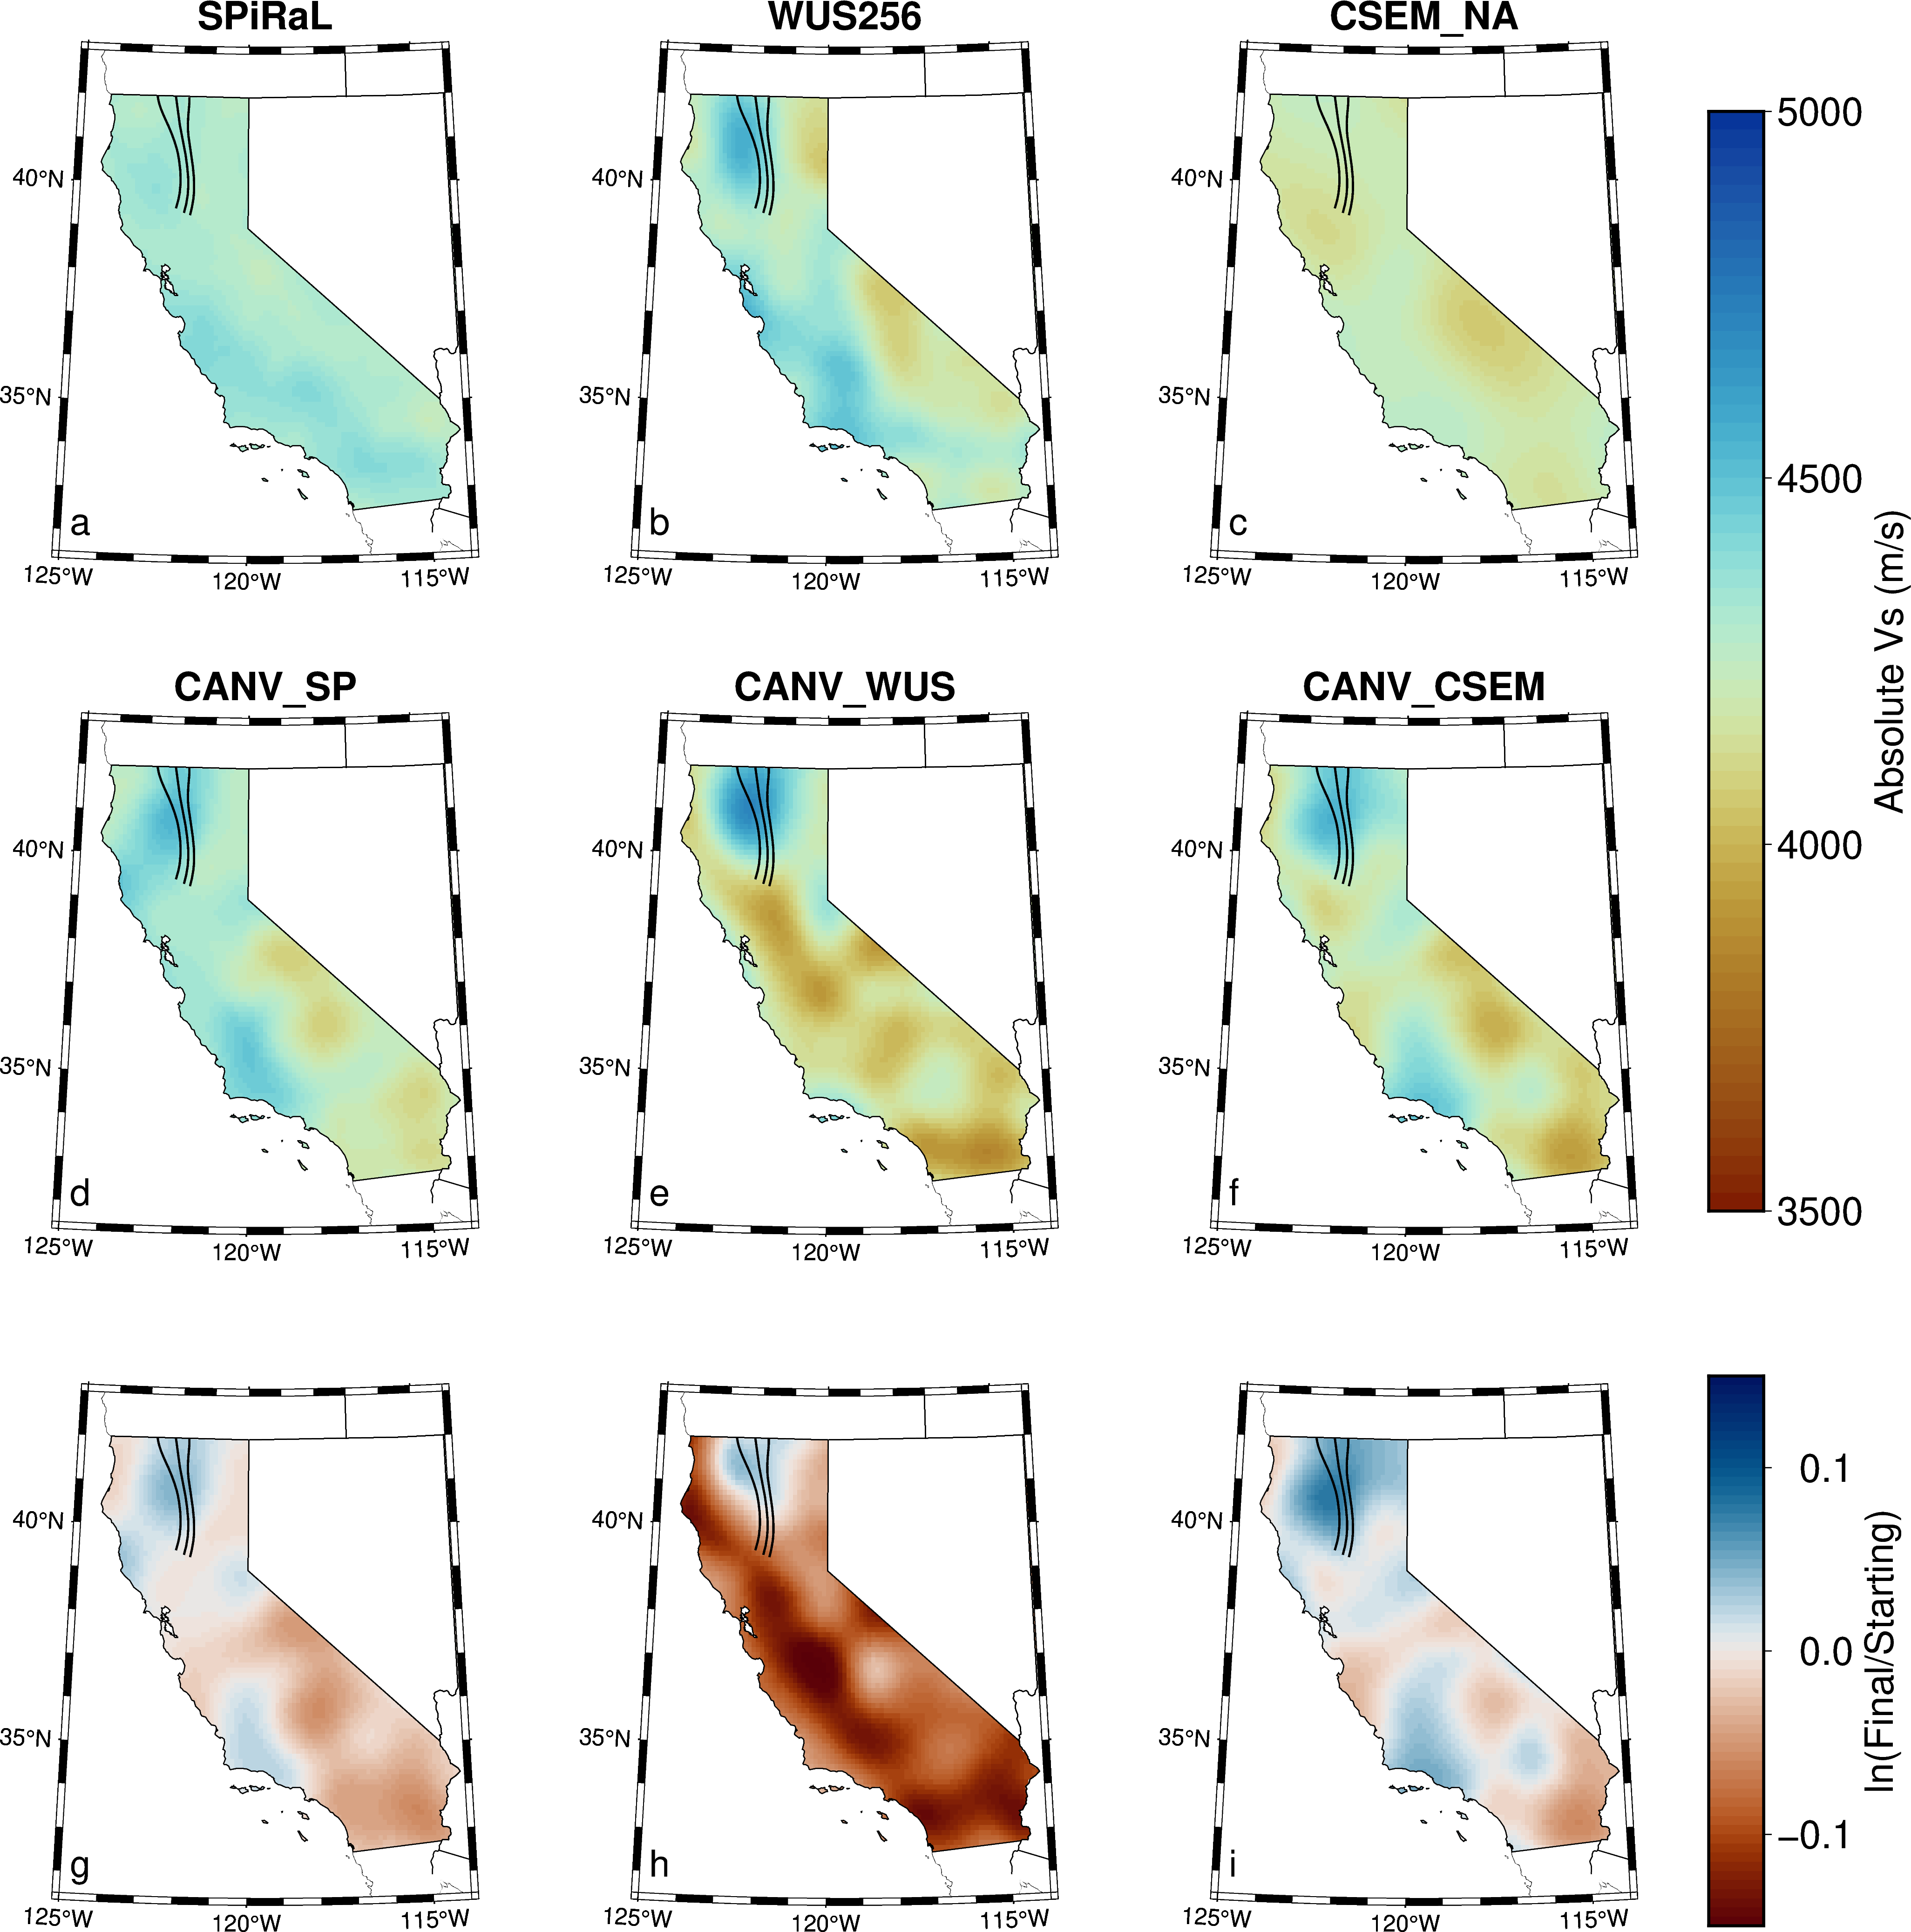

In [110]:
fig = pygmt.Figure()

#pygmt.makecpt(cmap="roma", series=vs_series)
#pygmt.makecpt(cmap="vik", reverse = True)
font = "20p,Helvetica-Bold"
# 'vik' = pygmt.makecpt(cmap='vik', series = (-0.2,0.2,0.05))
# cmap = 'roma'
with fig.subplot(ncols = 3, nrows = 3, figsize = ('30c','35c'), margins = ('0.5c','0.5c'),
                 autolabel = 'a+jBL+o0.2c/0.4c+gwhite'):
    with fig.set_panel(panel = [0,0]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #SPiRaL Starting Model 5km Slice Vs
        SPiRaL = 'SPiRaL'
        fig.grdimage(grid=pygmt.grdclip(vav_sp_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', 
                 pen = '1.0p,black', panel = [0,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite',
                  panel = [0,0])
        fig.text(x = -120.55, y = 42.3, text = SPiRaL, font = font)
    with fig.set_panel(panel = [0,1]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #WUS Starting Model 5km Slice VS
        WUS = 'WUS256'
        fig.grdimage(grid=pygmt.grdclip(vav_ws_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [0,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [0,1])
        fig.text(x = -120.55, y = 42.3, text = WUS, font = font)
    with fig.set_panel(panel = [0,2]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #CSEM Starting Model 5km Slice VS
        CSEM = 'CSEM_NA'
        fig.grdimage(grid=pygmt.grdclip(vav_cs_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', pen = '1.0p,black',panel = [0,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [0,2])
        fig.text(x = -120.55, y = 42.3, text = CSEM, font = font)
    #CANV_SP Starting Model 5km Slice Vs
    with fig.set_panel(panel = [1,0]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        CNSP = 'CANV_SP'
        fig.grdimage(grid=pygmt.grdclip(vav_cnsp_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', pen = '1.0p,black',panel = [1,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  panel = [1,0])
        fig.text(x = -120.55, y = 42.3, text = CNSP, font = font)
    with fig.set_panel(panel = [1,1]):
        pygmt.makecpt(cmap="roma", series=vs_series)
        #CANV_WUS Starting Model 5km Slice VS
        fig.grdimage(grid=pygmt.grdclip(vav_cnws_2, below=vs_below, above=vs_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [1,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], 
                  dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [1,1])
        fig.text(x = -120.55, y = 42.3, text = 'CANV_WUS', font = font)
    with fig.set_panel(panel = [1,2]):
        pygmt.makecpt(cmap="roma", series=vs_series)
         #CANV_CS Starting Model 5km Slice VS
        CNCS = 'CANV_CSEM'
        fig.grdimage(grid=pygmt.grdclip(vav_cncs_2, below=vs_below, above=vs_above), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [1,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [1,2])
        fig.text(x = -120.55, y = 42.3, text = CNCS, font = font)
    with fig.set_panel(panel = [2,0]):
        pygmt.makecpt(cmap='vik', series = ratio_series, reverse = True)
        SPratio = 'ln(CANV_SP/SPiRaL)'
        fig.grdimage(grid=pygmt.grdclip(sp_diff_2, below = ratio_below, above = ratio_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,0])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [2,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,0])
    with fig.set_panel(panel = [2,1]):
        pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
        WSratio = 'ln(CANV_WUS/WUS256)'
        fig.grdimage(grid=pygmt.grdclip(wus_diff_2, below = ratio_below, above = ratio_above), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,1])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [2,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,1])
    with fig.set_panel(panel = [2,2]):
        pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
        CSratio = 'ln(CANV_CSEM/CSEM_NA)'
        fig.grdimage(grid=pygmt.grdclip(csem_diff_2, below = ratio_below, above = ratio_above), projection='L-119.5/37.25/31.5/43.0/7.5c', 
                    panel = [2,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,2])
        fig.plot(gorda, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',pen = '1.0p,black', panel = [2,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', 
                  borders=["1/black", "2/black"], panel = [2,2])

    
with pygmt.config(FONT='20p'):
    cmap = pygmt.makecpt(cmap="roma", series=vs_series)
    fig.colorbar(cmap=cmap, position="JMR+o15c/15c+w20c/1c",
    frame=["a500",'x+l"Absolute Vs (m/s)"'])
    cmap = pygmt.makecpt(cmap='vik', series = ratio_series,reverse = True)
    fig.colorbar(cmap = cmap, position="JMR+o15c/-3c+w10c/1c",
                frame=["a0.1",'x+l"ln(Final/Starting)"'])

fig.show()

In [111]:
fig.savefig('FigureS5_Map_View_100km.jpg')

# Plotting Routine for Anisotropy

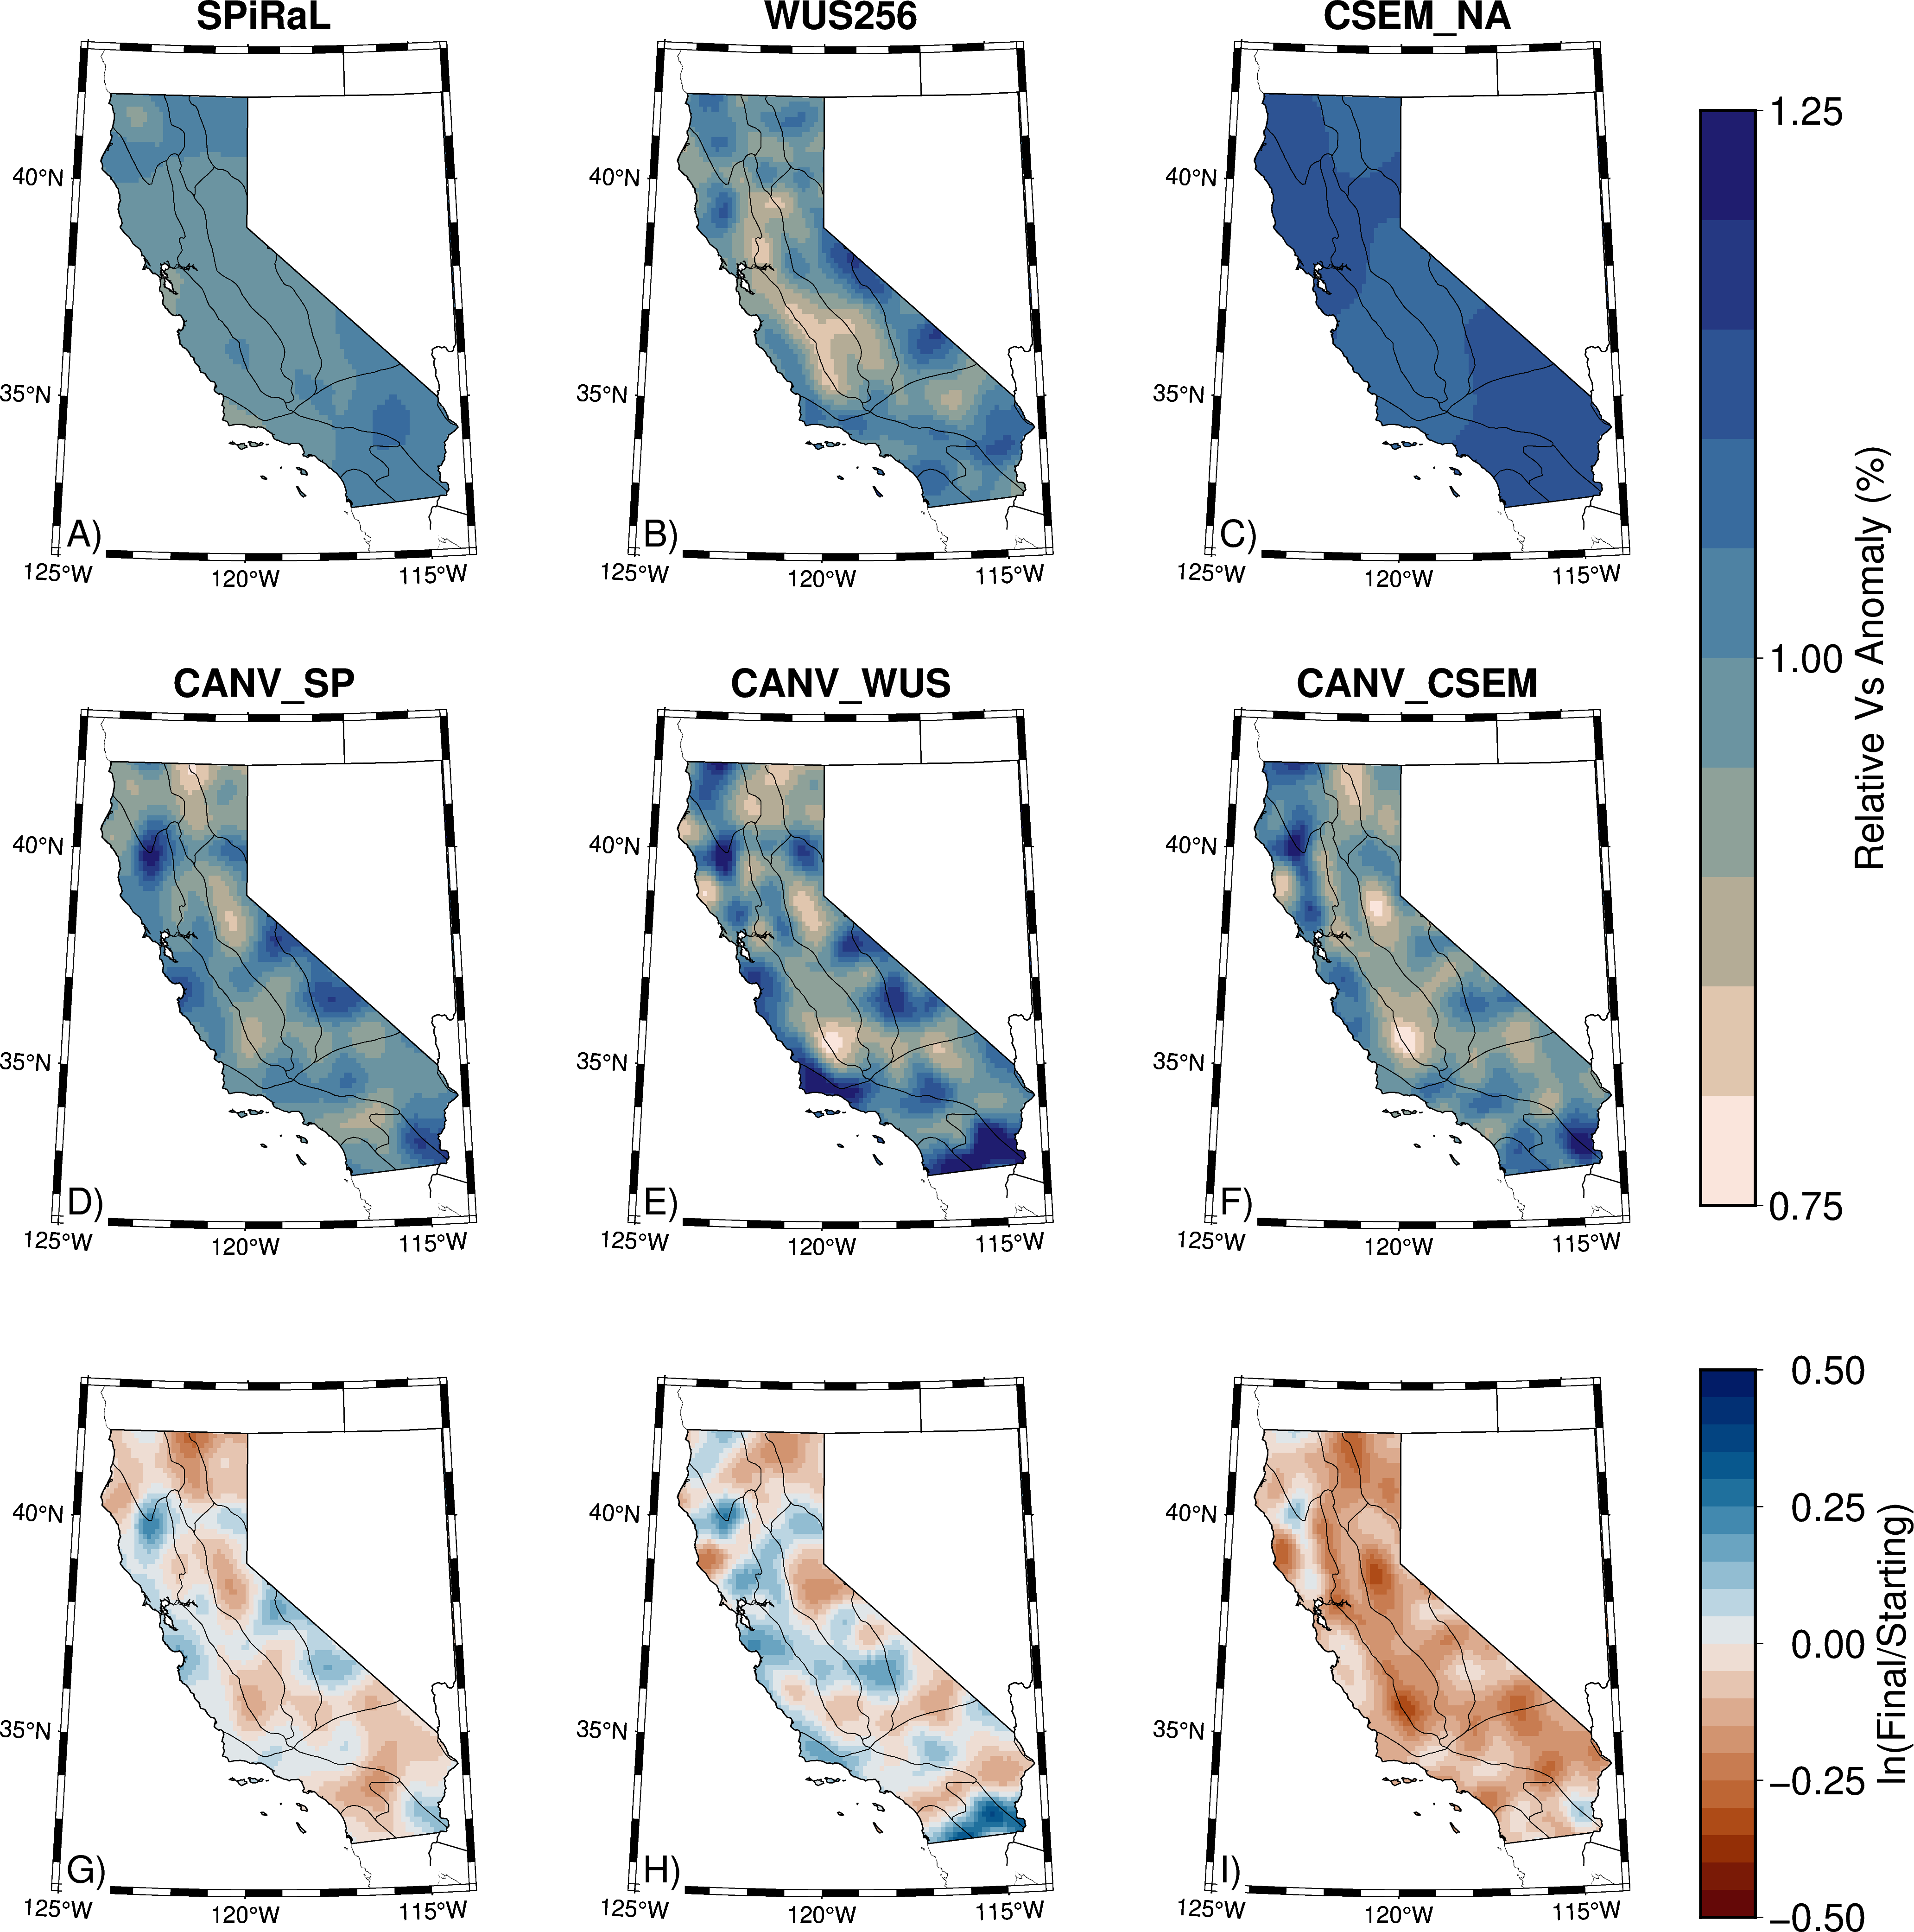

In [36]:
fig = pygmt.Figure()

#pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
##pygmt.makecpt(cmap="vik", reverse = True)
font = "20p,Helvetica-Bold"
#'vik' = pygmt.makecpt(cmap='vik', series = (-0.2,0.2,0.05))
#cmap = 'roma'
with fig.subplot(ncols = 3, nrows = 3, figsize = ('30c','35c'), margins = ('0.5c','0.5c'),
                 autolabel = 'A)+jBL+gwhite'):
    with fig.set_panel(panel = [0,0]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
        #SPiRaL Starting Model 5km Slice Vs
        SPiRaL = 'SPiRaL'
        fig.grdimage(grid=pygmt.grdclip(eta_sp_1, below=[0.75,0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,0])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite',
                  panel = [0,0])
        fig.text(x = -120.55, y = 42.3, text = SPiRaL, font = font)
    with fig.set_panel(panel = [0,1]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
        #WUS Starting Model 5km Slice VS
        WUS = 'WUS256'
        fig.grdimage(grid=pygmt.grdclip(eta_wus_1, below=[0.75,0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,1])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [0,1])
        fig.text(x = -120.55, y = 42.3, text = WUS, font = font)
    with fig.set_panel(panel = [0,2]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
        #CSEM Starting Model 5km Slice VS
        CSEM = 'CSEM_NA'
        fig.grdimage(grid=pygmt.grdclip(eta_cs_1, below=[0.75,0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [0,2])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [0,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [0,2])
        fig.text(x = -120.55, y = 42.3, text = CSEM, font = font)
    #CANV_SP Starting Model 5km Slice Vs
    with fig.set_panel(panel = [1,0]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
        CNSP = 'CANV_SP'
        fig.grdimage(grid=pygmt.grdclip(eta_cnsp_1, below=[0.75,0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,0])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [1,0])
        fig.text(x = -120.55, y = 42.3, text = CNSP, font = font)
    with fig.set_panel(panel = [1,1]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
        #CANV_WUS Starting Model 5km Slice VS
        CNWS = 'CANV_WUS'
        fig.grdimage(grid=pygmt.grdclip(eta_cnws_1, below=[0.75,0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,1])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], borders=["1/black", "2/black"], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', panel = [1,1])
        fig.text(x = -120.55, y = 42.3, text = CNWS, font = font)
    with fig.set_panel(panel = [1,2]):
        pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
         #CANV_CS Starting Model 5km Slice VS
        CNCS = 'CANV_CSEM'
        fig.grdimage(grid=pygmt.grdclip(eta_cncs_1, below=[0.75, 0.75], above=[1.25,1.25]), projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [1,2])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [1,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', borders=["1/black", "2/black"], panel = [1,2])
        fig.text(x = -120.55, y = 42.3, text = CNCS, font = font)
    with fig.set_panel(panel = [2,0]):
        pygmt.makecpt(cmap='vik', series = (-0.5,0.5,0.05), reverse = True)
        SPratio = 'ln(CANV_SP/SPiRaL)'
        fig.grdimage(grid=pygmt.grdclip(eta_sp_diff, below = [-0.5,-0.5], above = [0.5,0.5]), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,0])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,0])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,0])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', borders=["1/black", "2/black"], panel = [2,0])
    with fig.set_panel(panel = [2,1]):
        pygmt.makecpt(cmap='vik', series = (-0.5,0.5,0.05),reverse = True)
        WSratio = 'ln(CANV_WUS/WUS256)'
        fig.grdimage(grid=pygmt.grdclip(eta_ws_diff, below = [-0.5,-0.5], above = [0.5,0.5]), 
                     projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,1])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,1])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,1])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', borders=["1/black", "2/black"], panel = [2,1])
    with fig.set_panel(panel = [2,2]):
        pygmt.makecpt(cmap='vik', series = (-0.5,0.5,0.05),reverse = True)
        CSratio = 'ln(CANV_CSEM/CSEM_NA)'
        fig.grdimage(grid=pygmt.grdclip(eta_cs_diff, below = [-0.5,-0.5], above = [0.5,0.5]), projection='L-119.5/37.25/31.5/43.0/7.5c', 
                    panel = [2,2])
        fig.grdimage(grid=oceanmask, projection='L-119.5/37.25/31.5/43.0/7.5c', cmap = 'white', 
                     nan_transparent=True, panel = [2,2])
        fig.plot(physio, region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c', panel = [2,2])
        fig.coast(shorelines = '1/0.5p', region = [-125,-114,31.5,43.], projection='L-119.5/37.25/31.5/43.0/7.5c',
                    frame = ['af'], dcw = 'US.NV,US.OR,US.AZ,US.ID,MX+gwhite', borders=["1/black", "2/black"], panel = [2,2])

    
with pygmt.config(FONT='20p'):
    cmap = pygmt.makecpt(cmap="lapaz", series=(0.75,1.25,0.05), reverse = True)
    fig.colorbar(cmap=cmap, position="JMR+o15c/15c+w20c/1c",
    frame=["a0.25",'x+l"Relative Vs Anomaly (%)"'])
    cmap = pygmt.makecpt(cmap='vik', series = (-0.5,0.5,0.05),reverse = True)
    fig.colorbar(cmap = cmap, position="JMR+o15c/-3c+w10c/1c",
                frame=["a0.25",'x+l"ln(Final/Starting)"'])
fig.show()

In [37]:
fig.savefig('Anisotropy_Vs_15km.png')

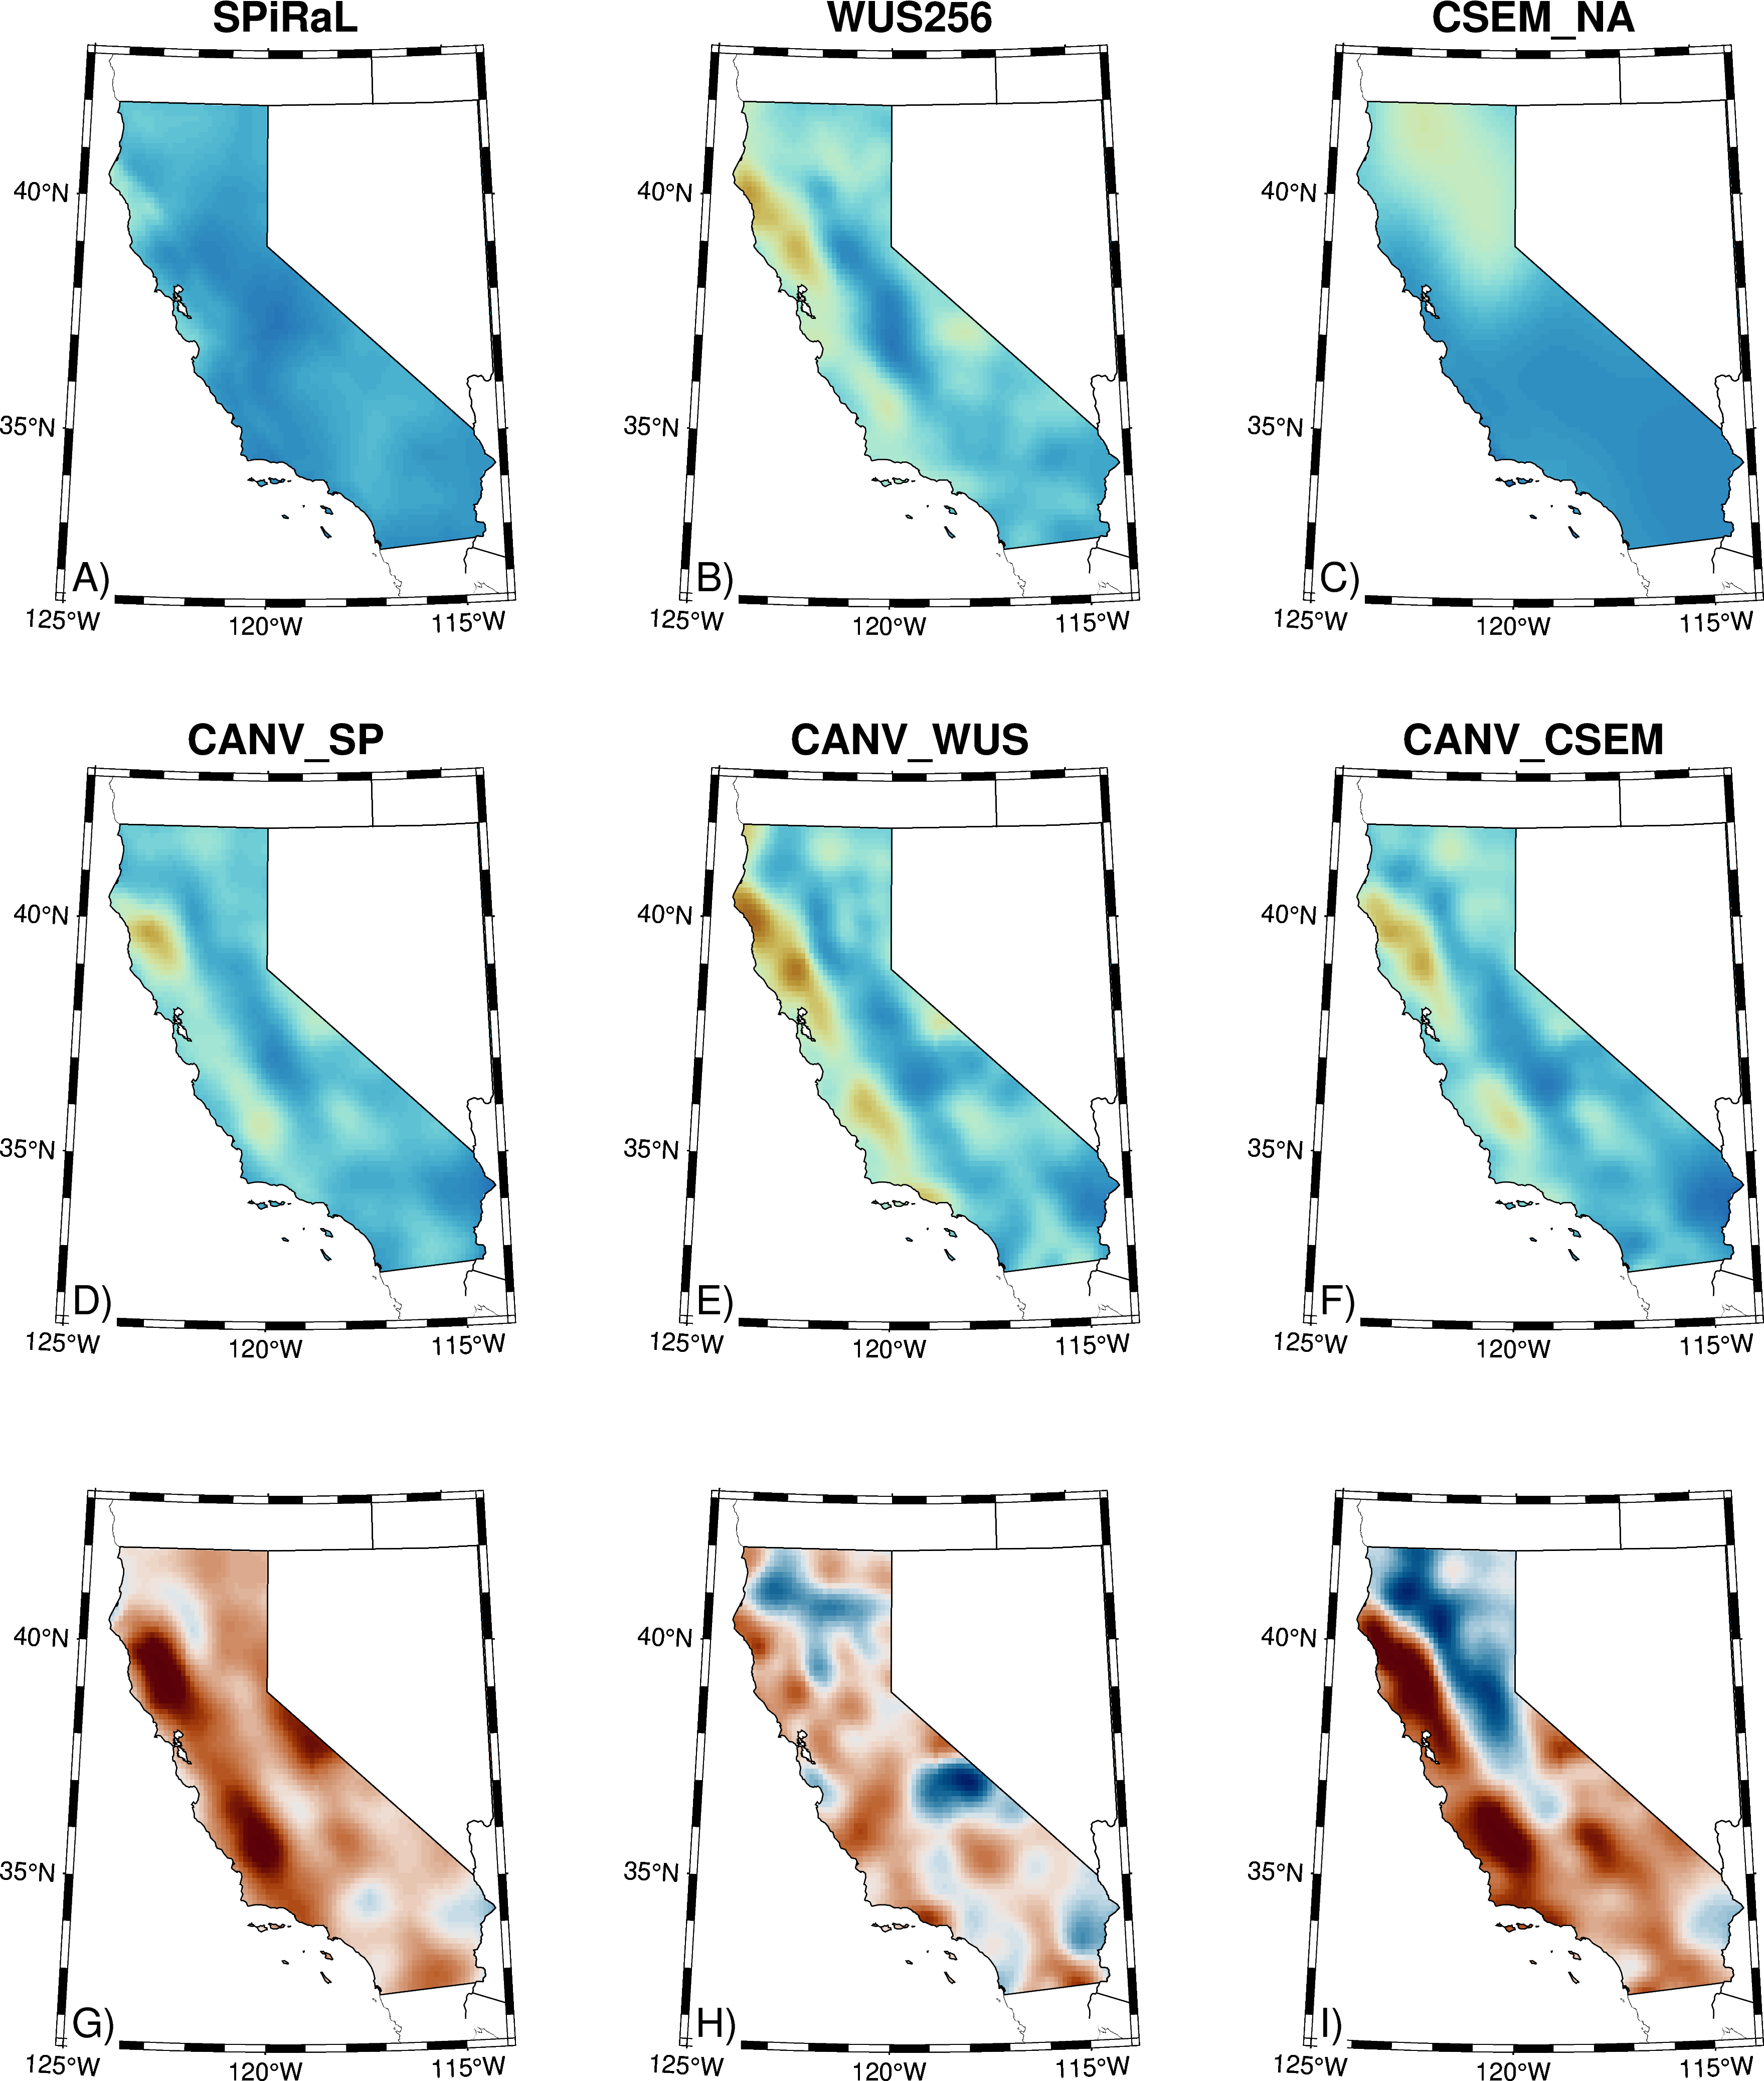

In [25]:
fig.show()